# Compare With Random Method


In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns

from exputils.dot.get_topK_Amat import get_topK_Amat
from exputils.dot.recovery_state import recovery_states_from_idxs
from exputils.extent.actual import calculate_extent_actual
from exputils.extent.custom import calculate_extent_custom
from exputils.stabilizer_group import total_stabilizer_group_size
from exputils.state.random_ket import make_random_quantum_state

  0%|          | 0/1080 [00:00<?, ?it/s]

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 16              
  Affine conic cons.     : 1080 (3240 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 3240            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0           

  0%|          | 0/36720 [00:00<?, ?it/s]

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 32              
  Affine conic cons.     : 36720 (110160 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 110160          
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.03            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0        

  0%|          | 0/2423520 [00:00<?, ?it/s]

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 64              
  Affine conic cons.     : 2423520 (7270560 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 7270560         
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 5.81            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0     

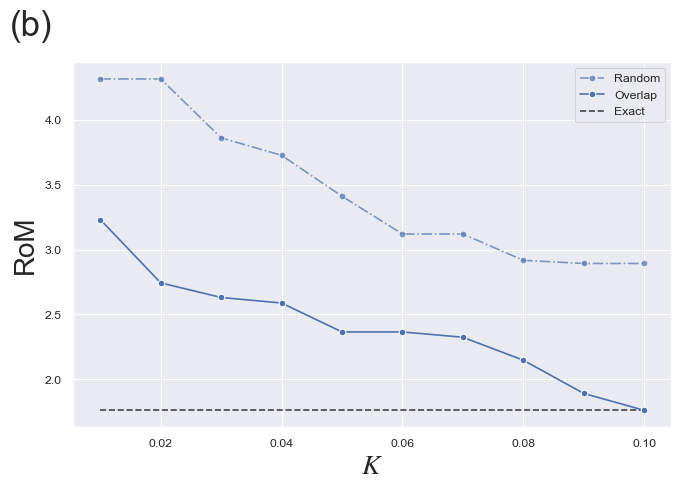

n=4, seed=0, K=1.000e-03, method='Random', extent=11.340849361101798
n=4, seed=0, K=2.000e-03, method='Random', extent=9.032830685617832
n=4, seed=0, K=3.000e-03, method='Random', extent=7.569928453285045
n=4, seed=0, K=4.000e-03, method='Random', extent=6.458234368893464
n=4, seed=0, K=5.000e-03, method='Random', extent=6.21590171924072
n=4, seed=0, K=6.000e-03, method='Random', extent=5.85323524448096
n=4, seed=0, K=7.000e-03, method='Random', extent=5.759290570130556
n=4, seed=0, K=8.000e-03, method='Random', extent=5.528743395148851
n=4, seed=0, K=9.000e-03, method='Random', extent=5.191000508128251
n=4, seed=0, K=1.000e-02, method='Random', extent=5.153139782423823
n=4, seed=0, K=1.000e-03, method='Overlap', extent=4.985440701179091
n=4, seed=0, K=2.000e-03, method='Overlap', extent=3.162633909010869
n=4, seed=0, K=3.000e-03, method='Overlap', extent=2.9881425947520506
n=4, seed=0, K=4.000e-03, method='Overlap', extent=2.886938081531423
n=4, seed=0, K=5.000e-03, method='Overlap', 

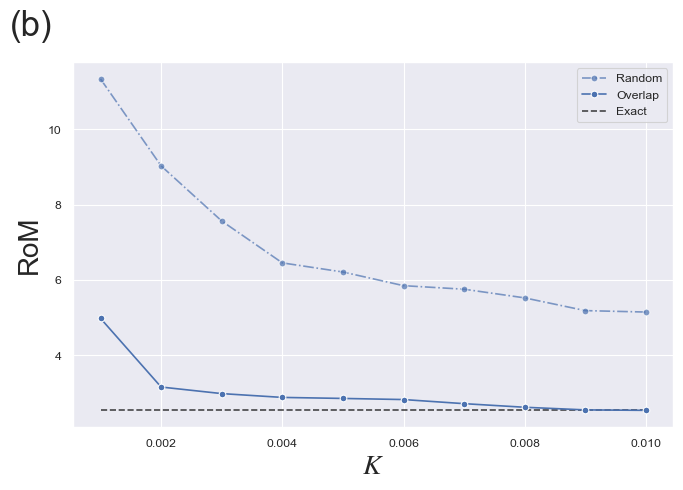

n=5, seed=0, K=1.000e-04, method='Random', extent=13.392796836952881
n=5, seed=0, K=2.000e-04, method='Random', extent=10.890083406371737
n=5, seed=0, K=3.000e-04, method='Random', extent=9.523289795908841
n=5, seed=0, K=4.000e-04, method='Random', extent=8.810496183147345
n=5, seed=0, K=5.000e-04, method='Random', extent=8.293005085931162
n=5, seed=0, K=6.000e-04, method='Random', extent=7.929317818745146
n=5, seed=0, K=7.000e-04, method='Random', extent=7.777611438815603
n=5, seed=0, K=8.000e-04, method='Random', extent=7.5919899240256115
n=5, seed=0, K=9.000e-04, method='Random', extent=7.481093074019634
n=5, seed=0, K=1.000e-03, method='Random', extent=7.427855671238518
n=5, seed=0, K=1.000e-04, method='Overlap', extent=7.3827627526001915
n=5, seed=0, K=2.000e-04, method='Overlap', extent=5.15165876504289
n=5, seed=0, K=3.000e-04, method='Overlap', extent=4.006577861076992
n=5, seed=0, K=4.000e-04, method='Overlap', extent=3.847014910554572
n=5, seed=0, K=5.000e-04, method='Overlap

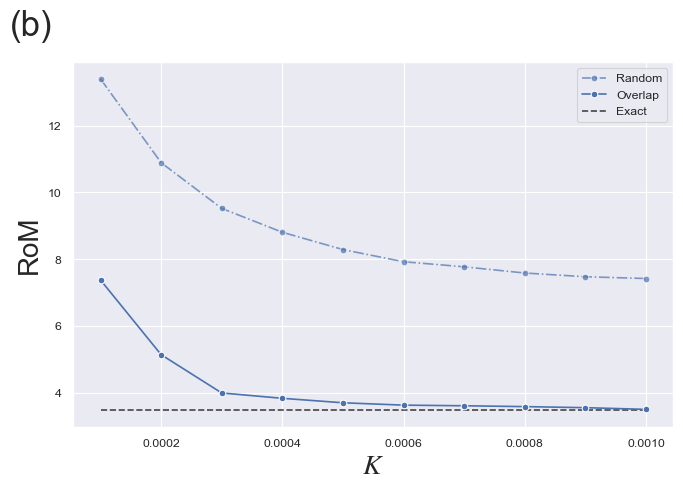

In [2]:
def calculate_extent_random(n, psi, _K, topK_Amat, rand_Amat):
    assert _K in np.linspace(0.1, 1.0, 10)
    Amat = scipy.sparse.hstack(
        [
            rand_Amat[:, -int(_K * rand_Amat.shape[1]) :],
            scipy.sparse.eye(2**n, format="csc", dtype=np.complex128),
        ]
    )
    assert Amat.shape[0] == (1 << n)
    return calculate_extent_custom(n, Amat, psi)[0]


def calculate_extent_dot(n, psi, _K, topK_Amat, rand_Amat):
    assert _K in np.linspace(0.1, 1.0, 10)
    Amat = scipy.sparse.hstack(
        [
            topK_Amat[:, -int(_K * topK_Amat.shape[1]) :],
            scipy.sparse.eye(2**n, format="csc", dtype=np.complex128),
        ]
    )
    return calculate_extent_custom(n, Amat, psi)[0]


def execute_experiments(n, maxK, kind):
    log_file_name = (
        pathlib.Path().resolve().parent / f"data/random_vs_overlap/{kind}_{n}_data.txt"
    )

    seed = 0
    psi = make_random_quantum_state(kind, n, seed)
    exact = calculate_extent_actual(n, psi, verbose=True)[0]
    with open(log_file_name, mode="w") as f:
        print(f"{exact=}", file=f)

    t_s_g_s = total_stabilizer_group_size(n)
    topK_Amat = get_topK_Amat(n, psi)
    rand_Amat = recovery_states_from_idxs(
        n, np.random.choice(t_s_g_s, size=int(t_s_g_s * maxK), replace=False)
    )

    methods = ["Random", "Overlap", "Exact"]
    functions = [calculate_extent_random, calculate_extent_dot, lambda *args: exact]
    for method, func in zip(methods, functions):
        for _K in np.linspace(0.1, 1.0, 10):
            print(f"{method=} {_K=:.3e}")
            extent = func(n, psi, _K, topK_Amat, rand_Amat)
            K = _K * maxK
            with open(log_file_name, mode="a") as f:
                print(f"{n=}, {seed=}, {K=:.3e}, {method=}, {extent=}", file=f)
    print("done")


def visualize_performance(n, kind):
    log_file_name = (
        pathlib.Path().resolve().parent / f"data/random_vs_overlap/{kind}_{n}_data.txt"
    )

    sns.set_theme("paper")
    color_table = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    rc = {"mathtext.fontset": "stix"}
    plt.rcParams.update(rc)

    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_subplot(1, 2, 1)

    with open(log_file_name, mode="r") as f:
        lines = f.readlines()
        lines.pop(0)
        colors = [color_table[0], color_table[0], "black"]
        markers = ["o", "o", None]
        alphas = [0.7, 1, 0.7]
        methods = ["Random", "Overlap", "Exact"]
        line_styles = ["-.", "-", "--"]
        for i in range(3):
            Ks = []
            extents = []
            for _ in range(10):
                print(lines[0].strip())
                _K, _method, _extent = map(str.strip, lines.pop(0).split(",")[2:])
                K = float(_K[_K.find("=") + 1 :])
                extent = float(_extent[_extent.find("=") + 1 :])
                assert methods[i] == _method[_method.find("=") + 2 : -1]
                Ks.append(K)
                extents.append(extent)
            sns.lineplot(
                data=pd.DataFrame({"K": Ks, "extent": extents}),
                x="K",
                y="extent",
                color=colors[i],
                label=methods[i],
                alpha=alphas[i],
                marker=markers[i],
                linestyle=line_styles[i],
                zorder=1 if methods[i] == "Exact" else 2,
            )

    ax.set_xlabel("$K$", fontsize=20)
    ax.set_ylabel("RoM", fontsize=20)
    ax.set_title("(b)", fontsize=25, x=-0.07, y=1.05)

    plt.tight_layout()
    plt.show()
    # plt.savefig(
    #     os.path.join(
    #         os.path.dirname(__file__), f"dot_and_coeff_and_RoM_dot_combined.png"
    #     ),
    #     dpi=500,
    # )


if __name__ == "__main__":
    execute_experiments(3, 0.1, "pure")
    execute_experiments(4, 0.01, "pure")
    execute_experiments(5, 0.001, "pure")
    # execute_experiments(6, 0.0001, "pure")
    visualize_performance(3, "pure")
    visualize_performance(4, "pure")
    visualize_performance(5, "pure")
    # visualize_performance(6, "pure")